# Programming Language Prediction Project

## Goal:
- Discover README features that indicate the repository programming language
- Use features to develop a machine learning model to predict the repository's main programming language

# Imports

In [214]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import wrangle as w
import explore as e
# import model as m
# import evaluate as ev

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import unicodedata
import nltk
from wordcloud import WordCloud
import os
import json

# import for exploring
from sklearn.model_selection import train_test_split
import scipy.stats as stats

# import for model 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Acquire
- Aquire a corpus of GitHub repository README files via GitHub API. 
* Our data comes from the top 100 most-starred repositories on GitHub current as of 27 Jun 2023.
- It contained 119 rows and 3 columns before cleaning
- Each row represents a repository.
- Each column represents the features of repository: repo name, language, README text

# Prepare
- Clean text by making all text lowercase
- Removed special characters
- Tokenizing the words into discrete units
- lemmatizing them to get word roots
- Checked for nulls dropped the 9 nulls that didn't contain languages
- Checked that column data types were appropriate
- Split data into train, validate, and test (60/20/20), stratifying on language.

# Data Dictionary

| Feature Name | Data Type | Description | Example |
| ----- | ----- | ----- | ----- |
| repo | object | Name of Repository | 'spolu/breach_core' |
| language | object | Predominant coding language of Repository | 'JavaScript' |
| readme_contents | object | Contents of Repository's README file | '### Breach: A Browser for the HTML5 Era...' |
| lemmatized | object | Cleaned version of contents of Repository's README file | 'breach browser html5 era modular everything...' |
| readme_length | integer | number of characters in the README file | 1069 |

# Taking another look at cleaning

In [215]:
import re

In [217]:
## acquire and prepare data for exploration
df = a.get_data_json()
df = w.clean_df(df)

In [218]:
df.shape

(110, 5)

In [70]:
# let's try this without the outliers
df = df[df.readme_length < 100000]
df.shape

(108, 5)

In [5]:
x = 70
print(df.iloc[x].readme_contents)
print()
print(df.iloc[x].lemmatized)

# KGStatusBar

A minimal status bar for iOS. Similair to the status bar seen in the MailBox app. It covers the top status bar and appears like the message is embedded within.

![KGStatusBar](http://s12.postimage.org/8thcnmnct/KGStatus_Bar.png)

## Installation

* Drag the `KGStatusBar/KGStatusBar` folder into your project.
* Add #include "KGStatusBar.h" to your .pch file

## Usage

KGStatusBar is a singleton. Make sure your view displays the default status bar for this to be effective. I defaulted the colors to match default. Change if needed.

### Showing the Status Bar

* [KGStatusBar showWithStatus:@"Loading"];
* [KGStatusBar showErrorWithStatus:@"Error Synching Files."];
* [KGStatusBar showSuccessWithStatus:@"Successfully synced"];

### Dismissing Status Bar

* [KGStatusBar dismiss];


Enjoy :)


Brought to you you by [Kevin Gibbon](https://twitter.com/kevingibbon). Currently raising hell at [Shyp](http://shyp.com)


kgstatusbar minimal status bar io similair status bar seen mailbo

In [219]:
## split data into train, validate, and test
train, validate, test = w.split_data(df)

# A brief look at the data

In [220]:
train.head()

,repo,language,readme_contents,lemmatized,readme_length
70,inkling/Subliminal,Objective-C,"<p align=""center"" >\n <img src=""http://inklin...",p aligncenter img srchttpinklinggithubiosublim...,11215
59,microsoftarchive/android-sliding-layer-lib,Java,6Wunderkinder SlidingLayer for Android\n======...,6wunderkinder slidinglayer android repository ...,4266
92,jamesob/tinychain,Python,"# ⛼ tinychain\n\n*Putting the rough in ""[roug...",tinychain putting rough rough consensushttpsto...,8333
104,Cleveroad/CRNetworkButton,Swift,# CRNetworkButton [![Awesome](https://cdn.rawg...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,5268
97,zhangxinxu/mobilebone,JavaScript,"mobilebone.js\n=============\n\n<img src=""http...",mobilebonejs img srchttpswwwzhangxinxucomgithu...,5908


## A summary of the data

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 107 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             64 non-null     object
 1   language         64 non-null     object
 2   readme_contents  64 non-null     object
 3   lemmatized       64 non-null     object
 4   readme_length    64 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.0+ KB


In [74]:
train.describe()

,readme_length
count,64.000000
mean,7069.406250
std,7763.544457
min,251.000000
25%,2231.000000
50%,4877.500000
75%,7663.000000
max,37368.000000


# Explore

## Question 1 What are the most common words in READMEs?

In [75]:
# split the words individually up and lemmatize them                                                                                                                                                                                                                                                                                                            
git_lem_words =" ".join(train.lemmatized).split()

lem_freq = pd.Series(git_lem_words).value_counts()

# create df of freq words
word_counts = pd.concat([lem_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ["lemmatize"]

# create df of most common words
word_counts.head(10)

,lemmatize
img,342
user,308
td,294
use,285
example,274
j,228
end,227
api,226
code,216
src,214


In [76]:
word_counts[(word_counts.index.str.len()) < 2]

,lemmatize
j,228
u,28
e,10
g,7
v,6
w,2
f,1


* The top five most common words are: rust, build, use, library, and file

## Question 2:  Is readme_length associated with language?

## Visualize

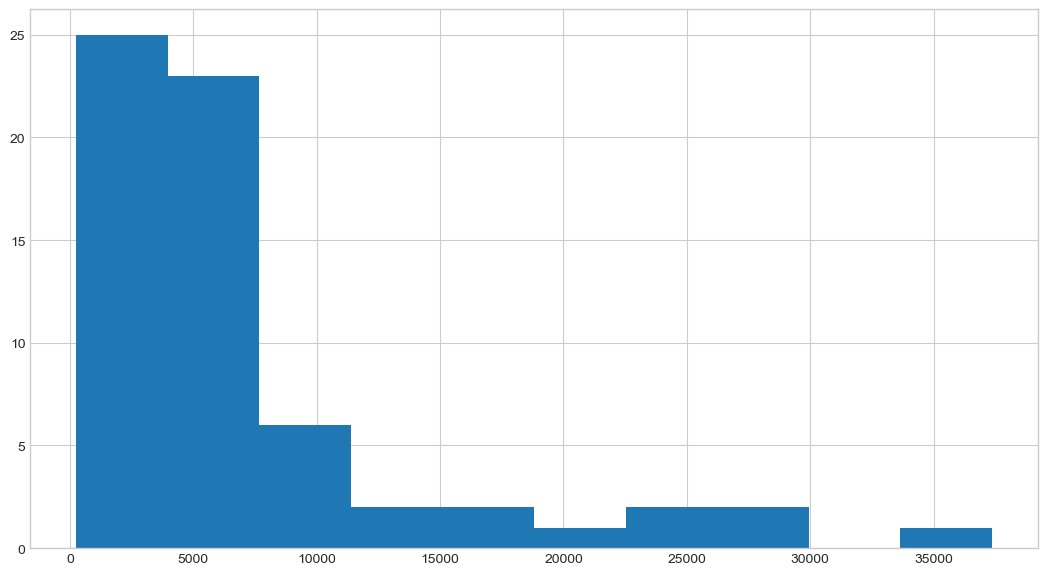

In [77]:
# first plot distribution of readme_length
train.readme_length.hist()
plt.show()

In [78]:
train[train.readme_length>50000]

,repo,language,readme_contents,lemmatized,readme_length


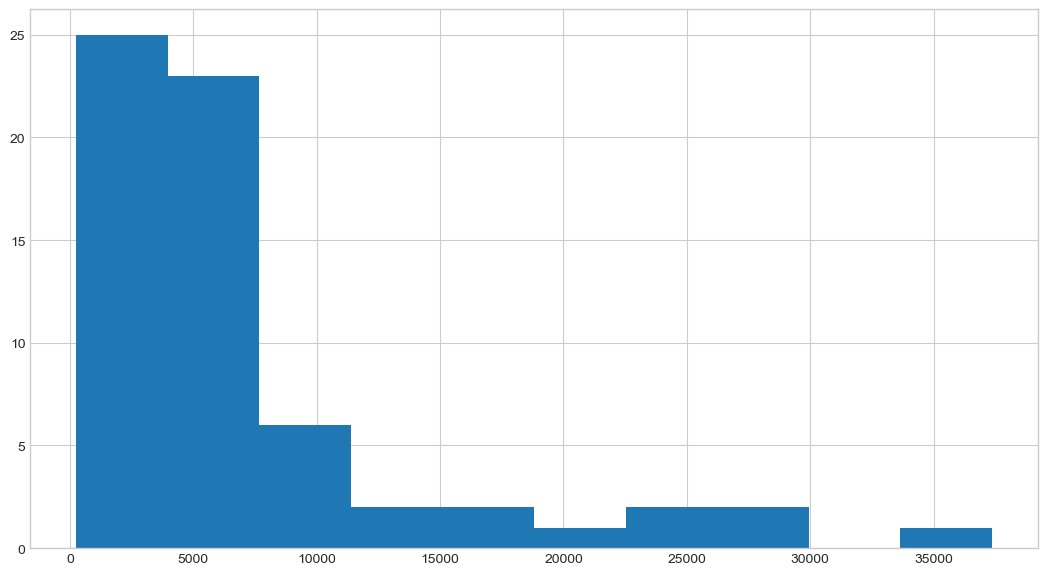

In [79]:
# One entry has a readme_length far above normal
# In order to zoom in on the distribution of the majority, let's view distribution without that outliers
train[train.readme_length<50000].readme_length.hist()
plt.show()

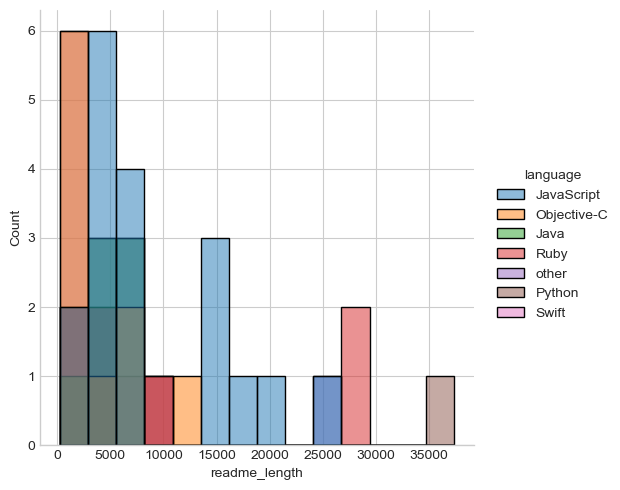

In [80]:
# make a histplot hued by language to visualize if readme_length is related to language at all
sns.displot(data=train[train.readme_length<50000],x='readme_length', hue='language', kind='hist') 
plt.show()

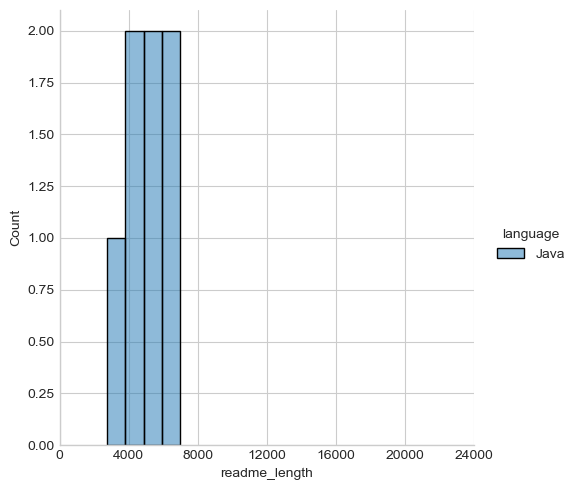

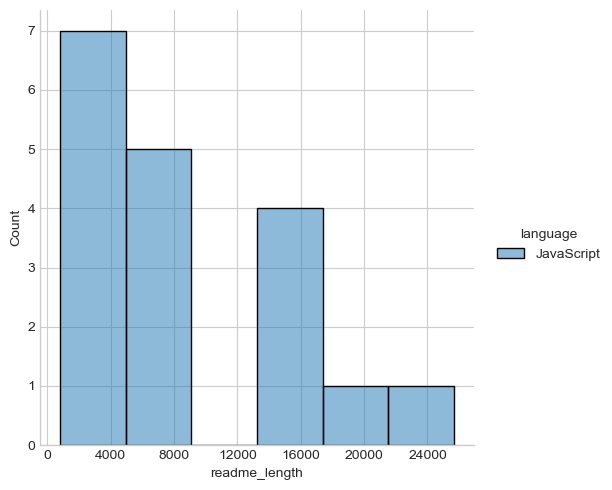

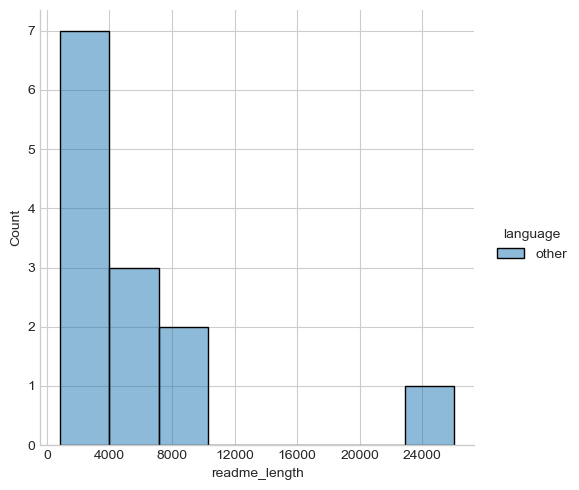

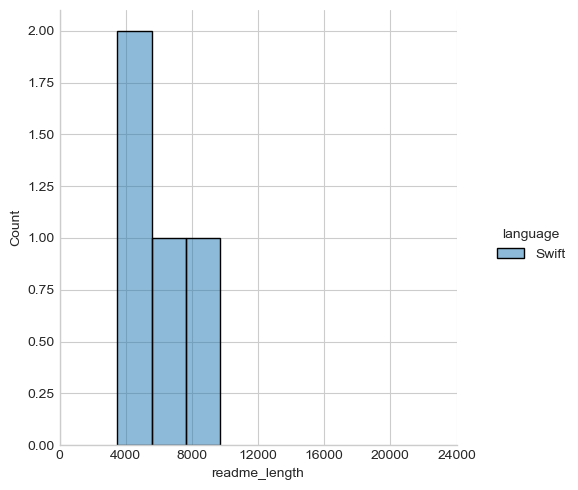

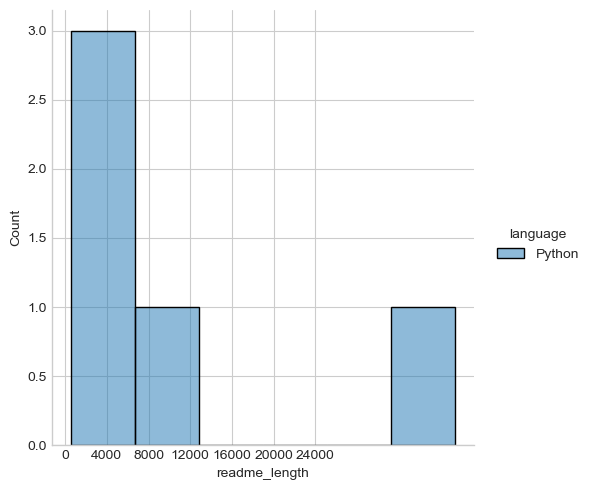

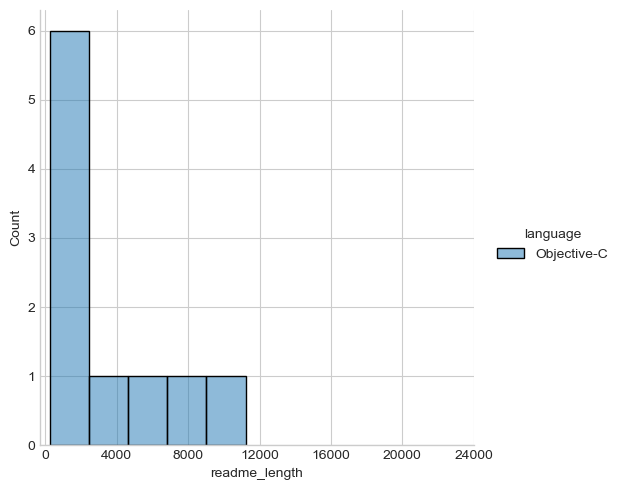

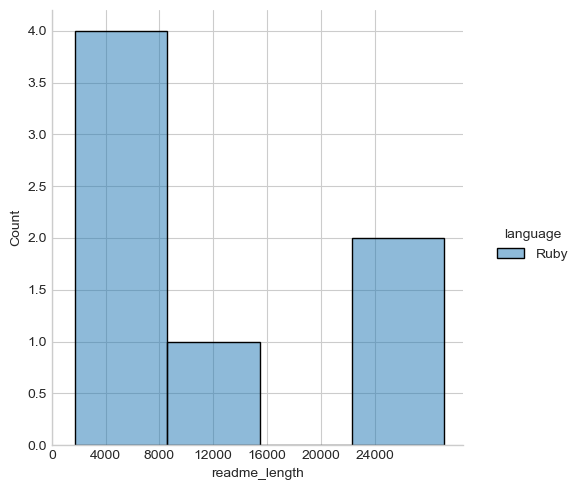

In [81]:
# the plot with everything on top of each other wasn't very useful, so
# plot histplots of readme_length separately for each language
for l in df.language.unique():
    sns.displot(data=train[(train.readme_length<50000) & (train.language == l)],x='readme_length', hue='language', kind='hist') 
    plt.xticks(ticks=range(0,28000, 4000))
    plt.show()

### Analyze readme_length vs language with statistics
- $H_0$ There is NO relationship between readme_length and language
- $H_a$ There IS a relationship
- $\alpha$ = .05
continuous vs categorical, not normally distributed, comparing subgroup means to each other
=> mann whitney test

In [234]:
train = train[train.readme_length < 100000]
train.shape

(65, 5)

In [241]:
train.head(1)

,repo,language,readme_contents,lemmatized,readme_length
70,inkling/Subliminal,Objective-C,"<p align=""center"" >\n <img src=""http://inklin...",p aligncenter img srchttpinklinggithubiosublim...,11215


In [225]:
# experimenting with krusker wallis
[l for l in train.language.unique()]

['Objective-C', 'Java', 'Python', 'Swift', 'JavaScript', 'Ruby', 'other']

In [244]:
stat, p = stats.kruskal(train[train.language=='Java'].readme_length
            , train[train.language=='Python'].readme_length
            , train[train.language=='Swift'].readme_length
            , train[train.language=='JavaScript'].readme_length
            , train[train.language=='Ruby'].readme_length
            , train[train.language=='Objective-C'].readme_length
            , train[train.language=='other'].readme_length
)

In [245]:
p

0.10598222340626538

In [82]:
# mannwhitneyu requires two array-like inputs, so this will iterate over all possible combinations of
# two different languages to test if there is a correlation
e.get_mannwhitneyu_combo_tests(train)

('JavaScript', 'Objective-C'): p-value = 0.0328267528808443

1 of 21 combinations had p-values < .05


### Summarize readme_length vs language

- p is > .05, in 18 of 21 combinations of languages, so we CANNOT reject the null hypothesis 
- In summary, there is no association between readme_length and language in most cases

## Question 3 Are there any words that uniquely identify a programming language?

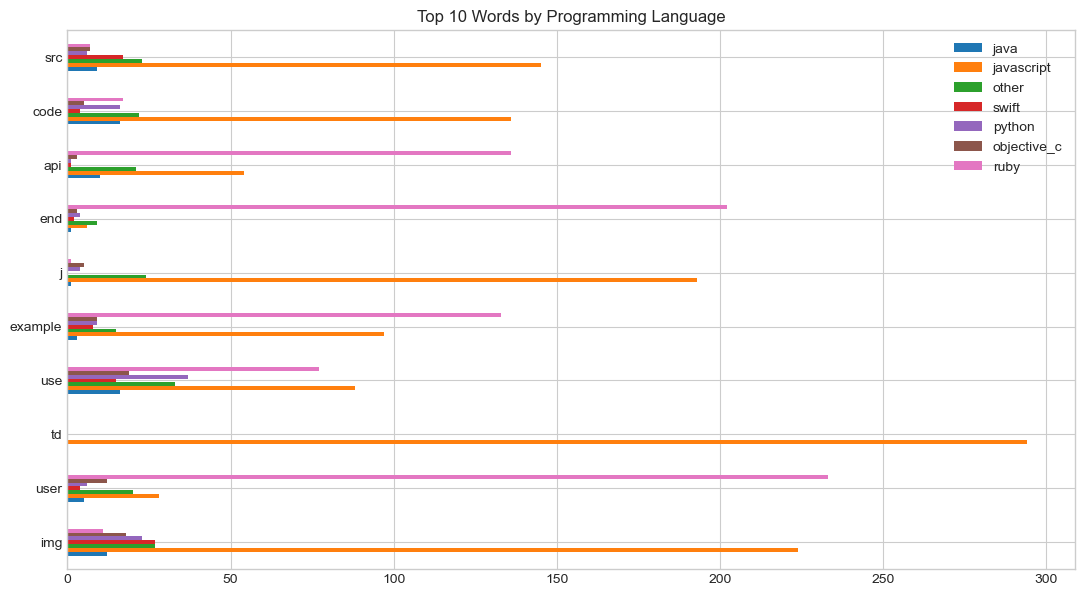

In [83]:
# top 10 word visualizes
e.get_word_viz(train[train.readme_length<100000])

### Summarize
* `Rust` was the most common for the other languages,
* `Use` was more profound in the JavaScript Langauge
* `User` was used more in Ruby 

## looking into the unique words question more, now that I've removed two outliers and done a different text cleaning

In [84]:
def get_word_counts_df(df):
    """
    This function will 
    - accept a dataframe (train df from github repo nlp project)
    - split up the words from lemmatized by language
    - do value_counts of each language
    - concat all the value_counts into a dataframe
    - return that df
    """
    # join words from all language categories together into one string, then split into list of words
    java_words = ' '.join(df[df.language == 'Java'].lemmatized).split()
    javascript_words = ' '.join(df[df.language == 'JavaScript'].lemmatized).split()
    other_words = ' '.join(df[df.language == 'other'].lemmatized).split()
    swift_words = ' '.join(df[df.language == 'Swift'].lemmatized).split()
    python_words = ' '.join(df[df.language == 'Python'].lemmatized).split()
    objectivec_words = ' '.join(df[df.language == 'Objective-C'].lemmatized).split()
    ruby_words = ' '.join(df[df.language == 'Ruby'].lemmatized).split()
    all_words = ' '.join(df.lemmatized).split()
    
    # get a series of value counts for each of language categories plus all words
    java_freq = pd.Series(java_words).value_counts()
    javascript_freq = pd.Series(javascript_words).value_counts()
    other_freq = pd.Series(other_words).value_counts()
    swift_freq = pd.Series(swift_words).value_counts()
    python_freq = pd.Series(python_words).value_counts()
    objectivec_freq = pd.Series(objectivec_words).value_counts()
    ruby_freq = pd.Series(ruby_words).value_counts()
    all_freq = pd.Series(all_words).value_counts()
    
    # combine freq series into a dataframe called word_counts
    word_counts = pd.concat([all_freq, java_freq, javascript_freq, other_freq
                            , swift_freq, python_freq, objectivec_freq, ruby_freq], axis = 1, sort=True)
    # fill na with 0
    word_counts = word_counts.fillna(0)
    # make values integers instead of floats
    word_counts = word_counts.apply(lambda s: s.astype(int))
    # rename the columns
    word_counts.columns = ['all', 'java', 'javascript', 'other', 'swift', 'python', 'objective_c', 'ruby']
    
    return word_counts

In [85]:
word_counts = get_word_counts_df(train)

In [86]:
word_counts.sort_values('all', ascending=False).head()

,all,java,javascript,other,swift,python,objective_c,ruby
img,342,12,224,27,27,23,18,11
user,308,5,28,20,4,6,12,233
td,294,0,294,0,0,0,0,0
use,285,16,88,33,15,37,19,77
example,274,3,97,15,8,9,9,133


In [87]:
# What are most common words for each category/column
for col in word_counts.columns:
    print(f'Top 5 words in {col}')
    display(word_counts.sort_values(by=col, ascending=False).head())

Top 5 words in all


,all,java,javascript,other,swift,python,objective_c,ruby
img,342,12,224,27,27,23,18,11
user,308,5,28,20,4,6,12,233
td,294,0,294,0,0,0,0,0
use,285,16,88,33,15,37,19,77
example,274,3,97,15,8,9,9,133


Top 5 words in java


,all,java,javascript,other,swift,python,objective_c,ruby
android,104,75,6,23,0,0,0,0
style,125,36,33,3,11,8,31,3
license,155,36,36,23,19,6,26,9
ghidra,34,34,0,0,0,0,0,0
custom,69,28,11,2,0,2,2,24


Top 5 words in javascript


,all,java,javascript,other,swift,python,objective_c,ruby
td,294,0,294,0,0,0,0,0
img,342,12,224,27,27,23,18,11
j,228,1,193,24,0,4,5,1
html,206,7,168,16,1,2,1,11
pre,176,1,165,1,3,0,0,6


Top 5 words in other


,all,java,javascript,other,swift,python,objective_c,ruby
color,161,5,3,133,5,3,12,0
setting,138,0,7,117,2,0,2,10
blend,75,0,0,75,0,0,0,0
include,129,3,12,56,0,0,3,55
background,71,0,12,56,1,0,2,0


Top 5 words in swift


,all,java,javascript,other,swift,python,objective_c,ruby
bemcheckbox,58,0,0,0,58,0,0,0
io,187,8,56,28,29,18,36,12
state,41,4,2,2,28,0,4,1
img,342,12,224,27,27,23,18,11
badge,87,8,36,11,23,2,3,4


Top 5 words in python


,all,java,javascript,other,swift,python,objective_c,ruby
cheat,149,0,0,0,0,149,0,0
sh,171,0,14,3,4,146,0,4
cht,82,0,0,0,0,82,0,0
sheet,76,0,0,0,0,76,0,0
repository,68,8,5,2,1,42,0,10


Top 5 words in objective_c


,all,java,javascript,other,swift,python,objective_c,ruby
subliminal,69,0,0,0,0,0,69,0
thcalendardatepicker,36,0,0,0,0,0,36,0
io,187,8,56,28,29,18,36,12
test,130,5,35,31,2,5,32,20
style,125,36,33,3,11,8,31,3


Top 5 words in ruby


,all,java,javascript,other,swift,python,objective_c,ruby
user,308,5,28,20,4,6,12,233
end,227,1,6,9,2,4,3,202
order,149,1,4,3,0,4,0,137
api,226,10,54,21,1,1,3,136
example,274,3,97,15,8,9,9,133


In [88]:
languages = word_counts.columns[1:]
languages

Index(['java', 'javascript', 'other', 'swift', 'python', 'objective_c',
       'ruby'],
      dtype='object')

In [89]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

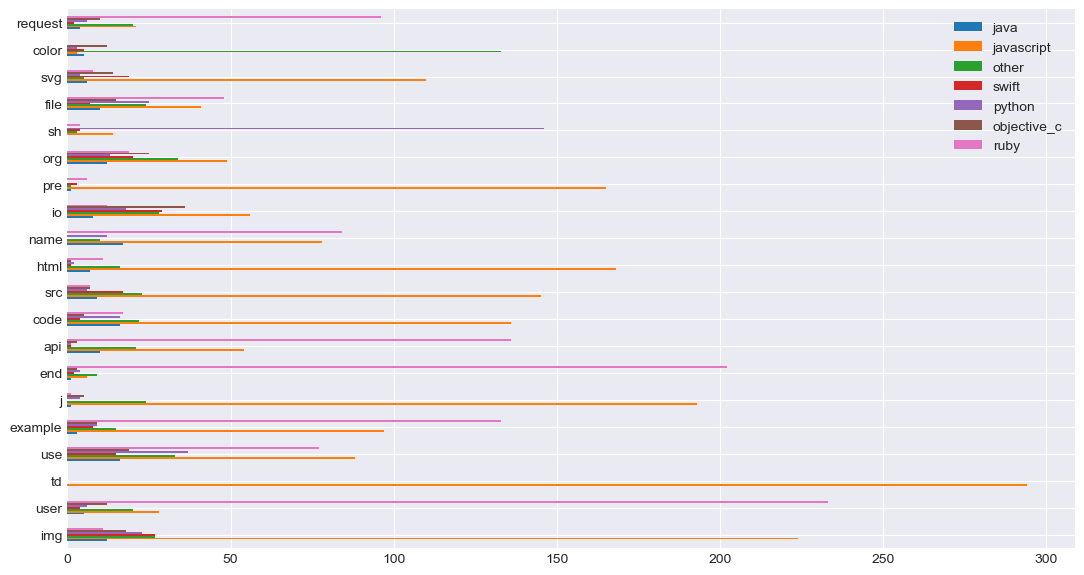

In [90]:
# visualization of top 20 words and ham vs spam
word_counts.sort_values('all', ascending=False)[languages].head(20).plot.barh()
plt.show()

In [92]:
columns_in_order = ['all', 'ruby', 'other', 'swift', 'python', 'objective_c', 'java', 'javascript']

In [93]:
# prep for a different plot: get percentage of languages vs all for top 20 words
word_counts[columns_in_order].sort_values('all', ascending=False).head(20)\
.apply(lambda row: row/row['all'], axis=1)

,all,ruby,other,swift,python,objective_c,java,javascript
img,1.0,0.032164,0.078947,0.078947,0.067251,0.052632,0.035088,0.654971
user,1.0,0.756494,0.064935,0.012987,0.019481,0.038961,0.016234,0.090909
td,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
use,1.0,0.270175,0.115789,0.052632,0.129825,0.066667,0.056140,0.308772
example,1.0,0.485401,0.054745,0.029197,0.032847,0.032847,0.010949,0.354015
j,1.0,0.004386,0.105263,0.000000,0.017544,0.021930,0.004386,0.846491
end,1.0,0.889868,0.039648,0.008811,0.017621,0.013216,0.004405,0.026432
api,1.0,0.601770,0.092920,0.004425,0.004425,0.013274,0.044248,0.238938
code,1.0,0.078704,0.101852,0.018519,0.074074,0.023148,0.074074,0.629630
src,1.0,0.032710,0.107477,0.079439,0.028037,0.032710,0.042056,0.677570


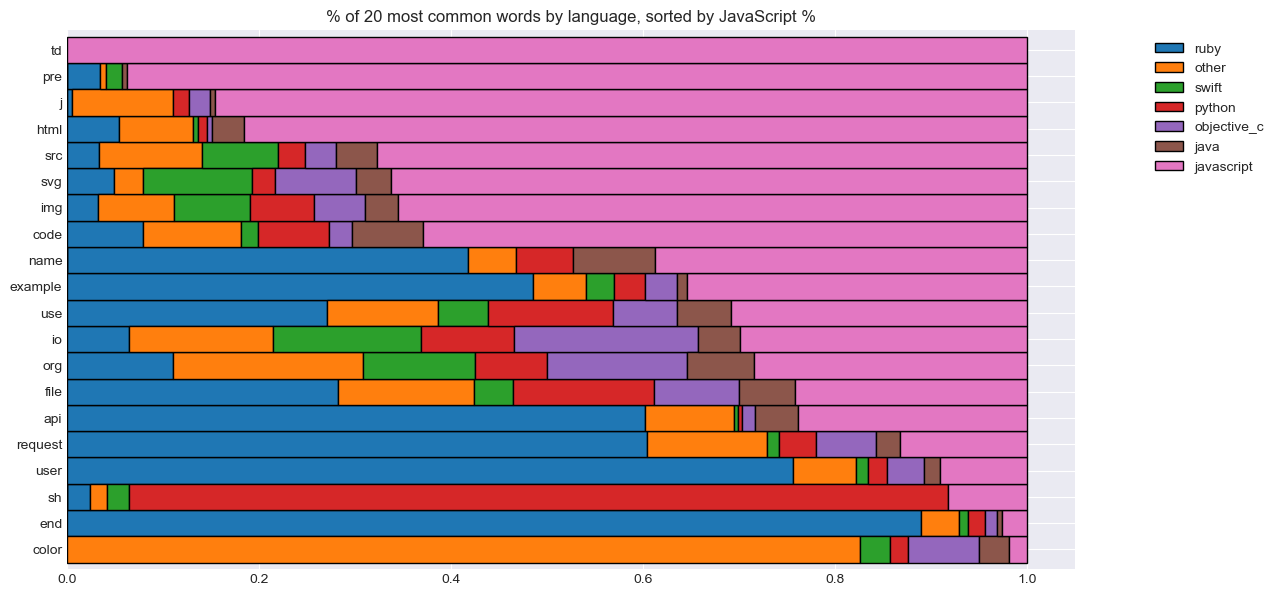

In [94]:
(word_counts[columns_in_order].sort_values('all', ascending=False).head(20)
.apply(lambda row: row/row['all'], axis=1)
.drop(columns='all')
.sort_values('javascript')
.plot.barh(stacked=True, width=1, ec='black')
)

plt.title('% of 20 most common words by language, sorted by JavaScript %')
# put legend outside of plot
plt.legend(bbox_to_anchor=(1.2, 1.0), loc='upper right')
plt.show()

## Question 4 Are there bigrams or n-grams that can uniquely identify a programming language?

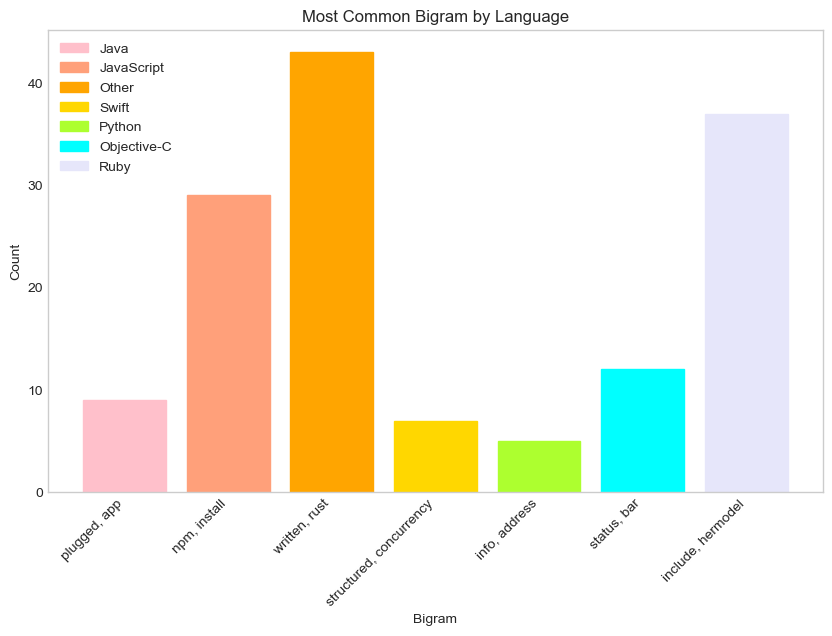

In [24]:
# visual of most common bigram by language
e.plot_bigrams_graph()

### Summarize
* All of the languages had a unique bigrams except for JavaScript and Objective-C. 
* `npm install` npm is a package manager for the JavaScript programming language

## Exploration Summary
* The top five most common words are: rust, build, use, library, and file
* Length of the readme was NOT associated with the programming language
* Features that have a relationship with target are:
    * The words themselves. Many words show up in a particular programming language README much more often than in the other language README's.
        * Example: The language category other is the only category that had the word 'rust'
    * Bigrams. Several bigrams were unique to a particular language
        * Example: (plugged, app) was only found in Java

### Features we am moving to modeling with: words, bigrams

### Features we am not moving to modeling with: readme_length

# Modeling
* Evaluation Metrics: We will use accuracy as our evaluation metrics
    * Baseline is 0.27 (guessing 'JavaScript' for every entry would have been correct 27% of the time)
* We will evaluate 3 different model types and various hyperparameter configurations
    * The three model types are DecisionTree, Random Forest, KNN
    * We will evaluate on words alone, bigrams alone, and words and bigrams
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test

In [95]:
## prep data for modeling
# get X y splits for modeling
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = e.split_data_xy(train, validate, test)

# create baseline 
baseline_accuracy = (train.language == "JavaScript").mean()
round(baseline_accuracy, 2)

train -> (64, 5)
validate -> (22, 5)
test -> (22, 5)


0.28

In [96]:
x_train.head()

107    gifhub chrome extension add button comment too...
74     j import react react import view react native ...
59     wunderkinder slidinglayer android repository h...
40     spec rail rspec info rubyforge org project rsp...
70     align center img src inkling io subliminal rea...
Name: lemmatized, dtype: object

In [133]:
# create bag of words
cv = CountVectorizer(ngram_range=(2,2))
x_bow = cv.fit_transform(x_train)
x_validate_bow = cv.transform(x_validate)
x_test_bow = cv.transform(x_test)

In [134]:
x_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]])

In [135]:
x_bow.shape

(64, 26299)

In [136]:
cv.get_feature_names_out()

array(['aa bbf', 'aaaaaaaahsm amrglt', 'aaaaaaaahtq tptoojhi', ...,
       'zshrc zsh', 'zt pjgthmb', 'zu jpg'], dtype=object)

In [137]:
bow = pd.DataFrame(x_bow.todense(), columns=cv.get_feature_names())
bow.head()

,aa bbf,aaaaaaaahsm amrglt,aaaaaaaahtq tptoojhi,aaffa nnpuclaaaaaelftksuqmcc,aar generate,aaron golden,aaron haney,ab ec,abelson one,ability change,...,zsh fpath,zsh function,zsh script,zsh stealth,zsh tab,zsh zsh,zshrc open,zshrc zsh,zt pjgthmb,zu jpg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Now, let's see about Naive Bayes models

In [138]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

In [139]:
x_bow

<64x26299 sparse matrix of type '<class 'numpy.int64'>'
	with 29120 stored elements in Compressed Sparse Row format>

In [140]:
#build my model
gnb = GaussianNB()
gnb.fit(x_bow.todense(), y_train)
gnb.score(x_bow.todense(), y_train)

# get model results
print(f" Train Score: {gnb.score(x_bow.todense(), y_train)}, Validation Score: {gnb.score(x_validate_bow.todense(), y_validate)}")

 Train Score: 1.0, Validation Score: 0.45454545454545453


In [141]:
#build my model
gnb = MultinomialNB()
gnb.fit(x_bow.todense(), y_train)
gnb.score(x_bow.todense(), y_train)

# get model results
print(f" Train Score: {gnb.score(x_bow.todense(), y_train)}, Validation Score: {gnb.score(x_validate_bow.todense(), y_validate)}")

 Train Score: 1.0, Validation Score: 0.5454545454545454


In [142]:
#build my model
gnb = ComplementNB()
gnb.fit(x_bow.todense(), y_train)
gnb.score(x_bow.todense(), y_train)

# get model results
print(f" Train Score: {gnb.score(x_bow.todense(), y_train)}, Validation Score: {gnb.score(x_validate_bow.todense(), y_validate)}")

 Train Score: 1.0, Validation Score: 0.5


In [143]:
#build my model
gnb = BernoulliNB()
gnb.fit(x_bow.todense(), y_train)
gnb.score(x_bow.todense(), y_train)

# get model results
print(f" Train Score: {gnb.score(x_bow.todense(), y_train)}, Validation Score: {gnb.score(x_validate_bow.todense(), y_validate)}")

 Train Score: 0.421875, Validation Score: 0.2727272727272727


In [144]:
# ### CategoricalNB threw an error, and I'm not sure how to fix it. 
# #build my model
# gnb = CategoricalNB()
# gnb.fit(x_bow.todense(), y_train)
# gnb.score(x_bow.todense(), y_train)

# # get model results
# print(f" Train Score: {gnb.score(x_bow.todense(), y_train)}, Validation Score: {gnb.score(x_validate_bow.todense(), y_validate)}")

## Model Name: DecisionTreeClassifier

## Following cells are Corey making sure I can replicate modeling

In [145]:
import my_model as m

In [146]:
m.get_dtree_scores(x_bow, x_validate_bow, y_train, y_validate, crit='gini', max_d=20)

,train_acc,val_acc,difference
max_depth,,,
1,0.375000,0.227273,0.147727
2,0.468750,0.227273,0.241477
3,0.546875,0.227273,0.319602
4,0.609375,0.272727,0.336648
5,0.703125,0.272727,0.430398
6,0.750000,0.272727,0.477273
7,0.796875,0.318182,0.478693
8,0.828125,0.318182,0.509943
9,0.859375,0.363636,0.495739


# Keila's work

In [110]:
#build my model
tree = DecisionTreeClassifier(max_depth=7, random_state=123)
tree.fit(x_bow, y_train)
tree.score(x_bow, y_train)

# get model results
print(f" Train Score: {tree.score(x_bow, y_train)}, Validation Score: {tree.score(x_validate_bow, y_validate)}")

 Train Score: 0.9375, Validation Score: 0.4090909090909091


* DecisionTreeClassifier beats baseline
* There is a noticeable drop between train and validate even on the best Decision Tree

In [147]:
# neat way to see the most predictive words for the decision tree model
pd.Series(dict(zip(cv.get_feature_names_out(), tree.feature_importances_))).sort_values().tail(10)

access name             0.035748
code mermaid            0.040037
badge svg               0.057070
apk file                0.059337
app complete            0.072795
client configuration    0.089479
created task            0.118934
command prelink         0.129119
behaviour driven        0.129258
change post             0.211026
dtype: float64

## Model: Random Forest

## Corey work

In [112]:
rf_df = m.get_rf_scores(x_bow, x_validate_bow, y_train, y_validate)
rf_df.head()

,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,trn_acc_depth_4,...,diff_7,trn_acc_depth_8,val_acc_depth_8,diff_8,trn_acc_depth_9,val_acc_depth_9,diff_9,trn_acc_depth_10,val_acc_depth_10,diff_10
min_samples_leaf,,,,,,,,,,,,,,,,,,,,,
1,0.296875,0.272727,0.024148,0.531250,0.318182,0.213068,0.890625,0.318182,0.572443,0.968750,...,0.681818,1.000000,0.363636,0.636364,1.000000,0.363636,0.636364,1.000000,0.409091,0.590909
2,0.296875,0.272727,0.024148,0.500000,0.318182,0.181818,0.875000,0.363636,0.511364,0.953125,...,0.650568,0.968750,0.318182,0.650568,0.968750,0.363636,0.605114,0.968750,0.318182,0.650568
3,0.281250,0.272727,0.008523,0.500000,0.318182,0.181818,0.765625,0.318182,0.447443,0.937500,...,0.680398,0.953125,0.272727,0.680398,0.953125,0.272727,0.680398,0.953125,0.272727,0.680398
4,0.281250,0.272727,0.008523,0.484375,0.318182,0.166193,0.671875,0.318182,0.353693,0.828125,...,0.494318,0.812500,0.318182,0.494318,0.812500,0.318182,0.494318,0.812500,0.318182,0.494318
5,0.281250,0.272727,0.008523,0.328125,0.272727,0.055398,0.578125,0.318182,0.259943,0.718750,...,0.430398,0.703125,0.272727,0.430398,0.703125,0.272727,0.430398,0.703125,0.272727,0.430398


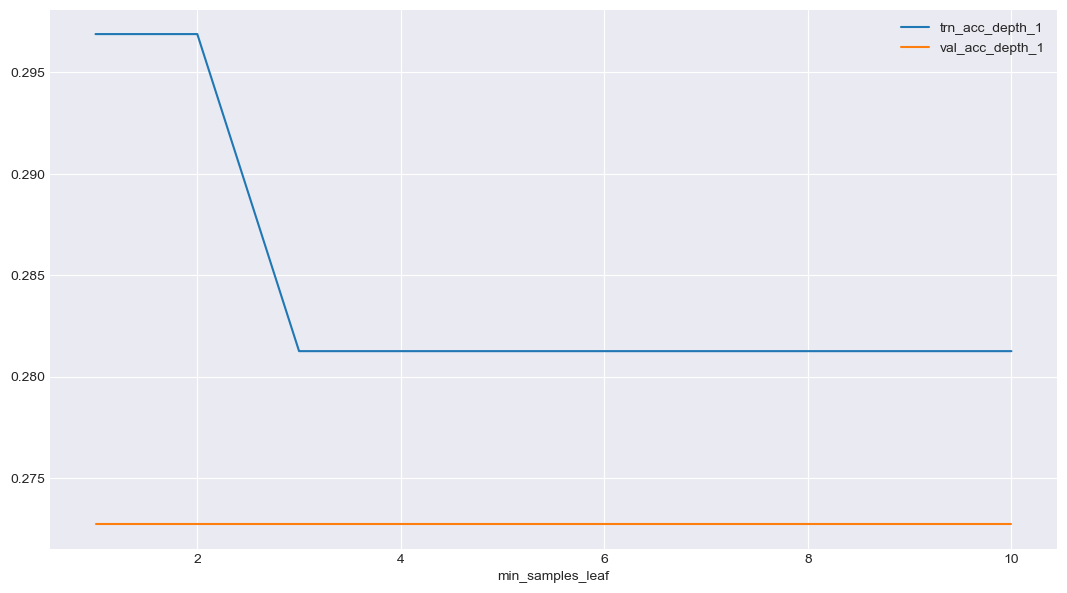

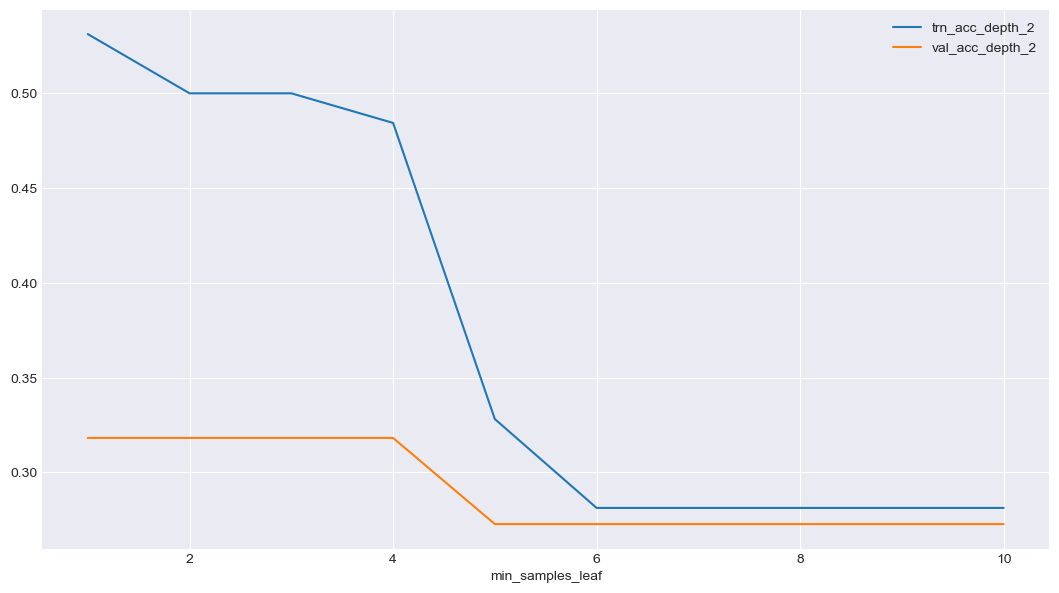

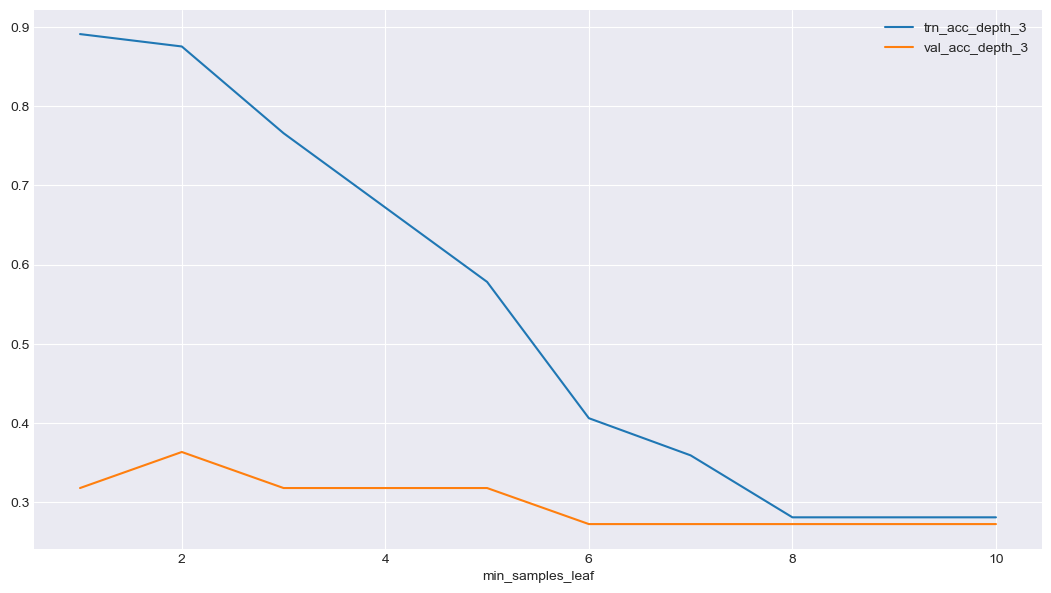

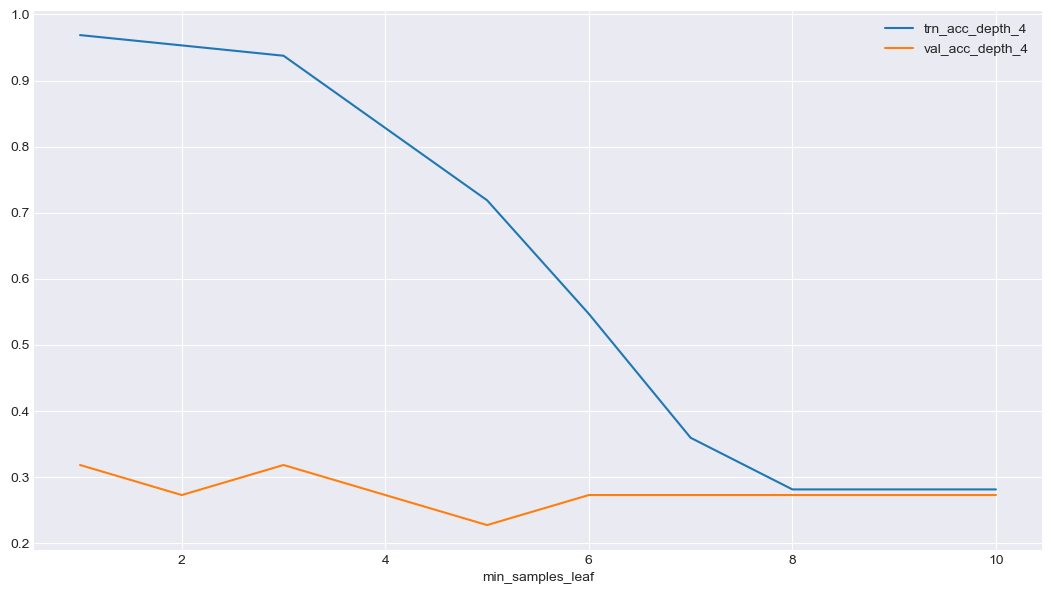

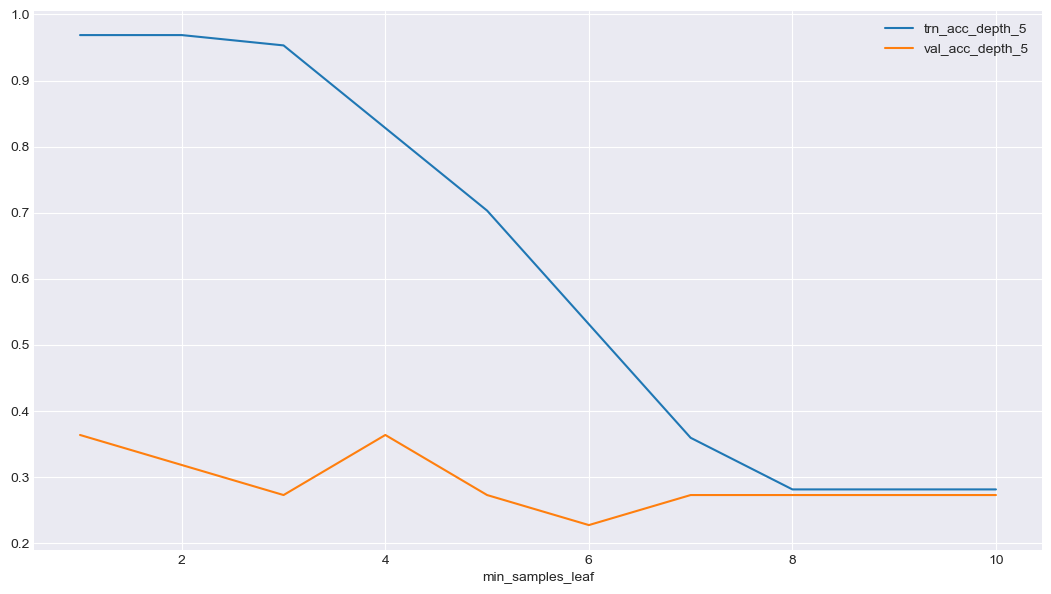

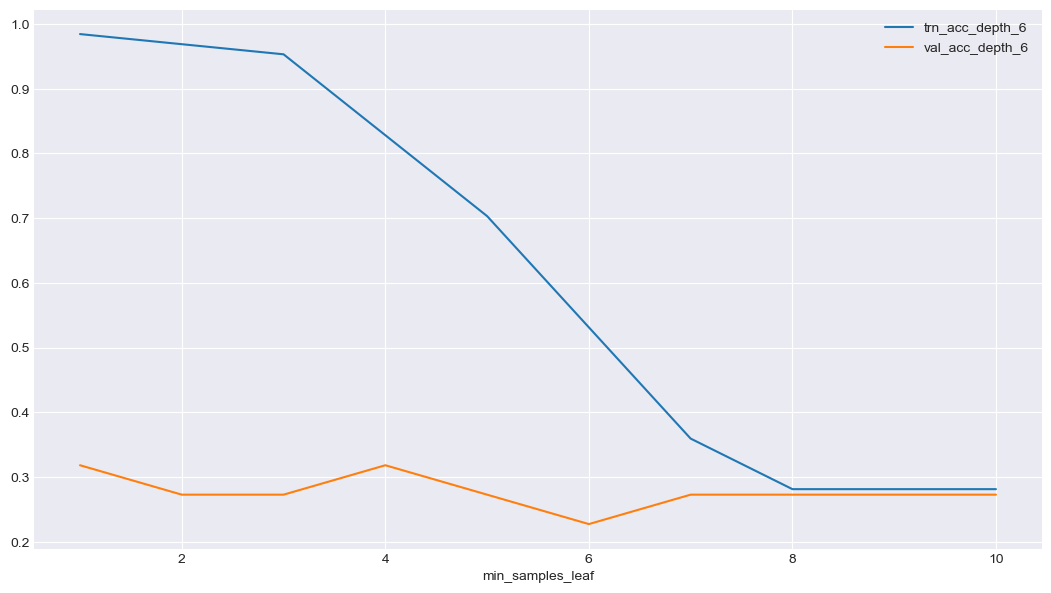

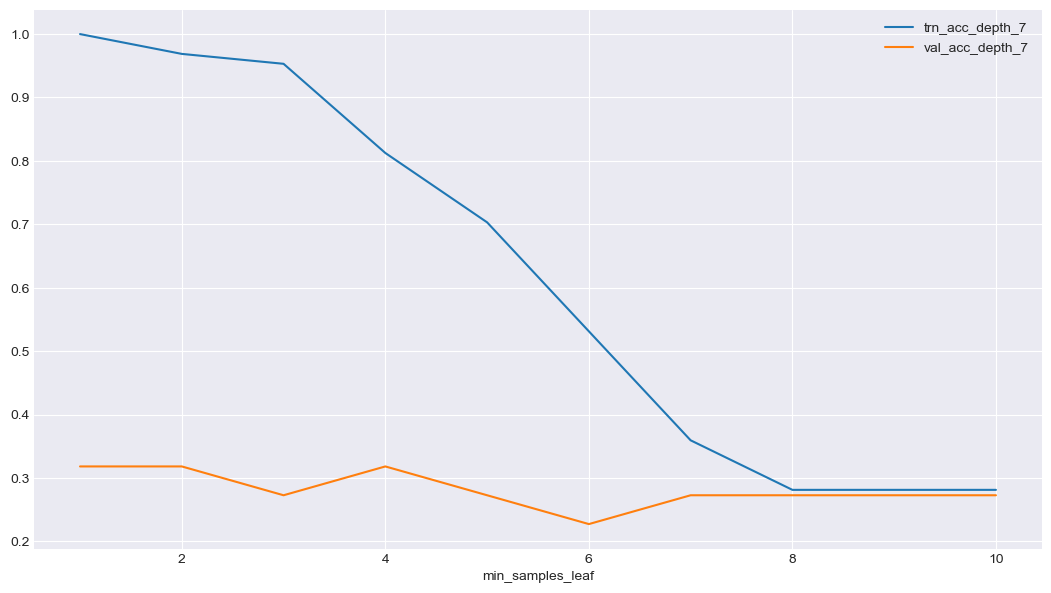

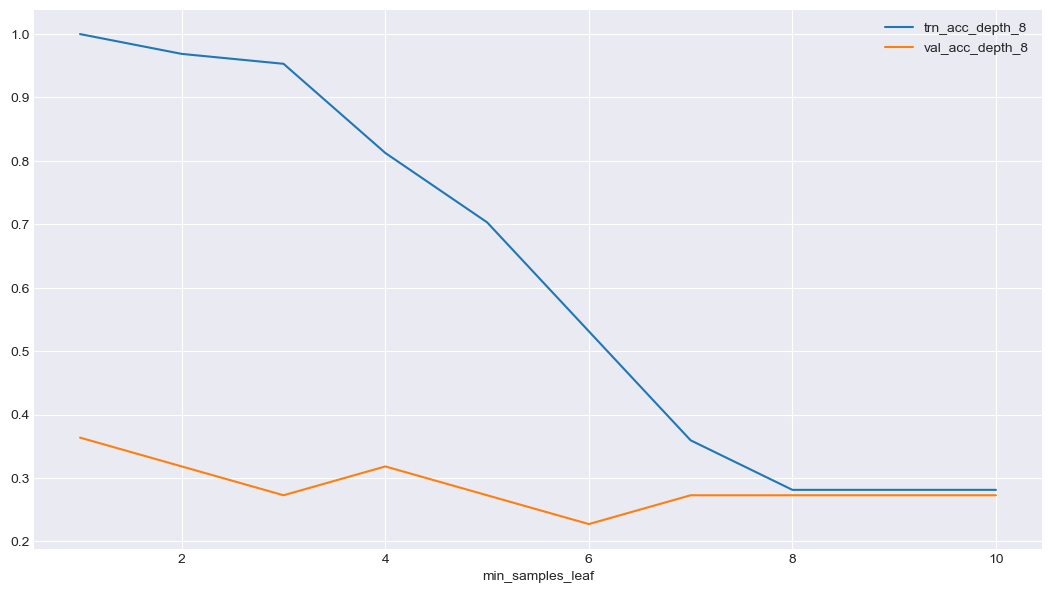

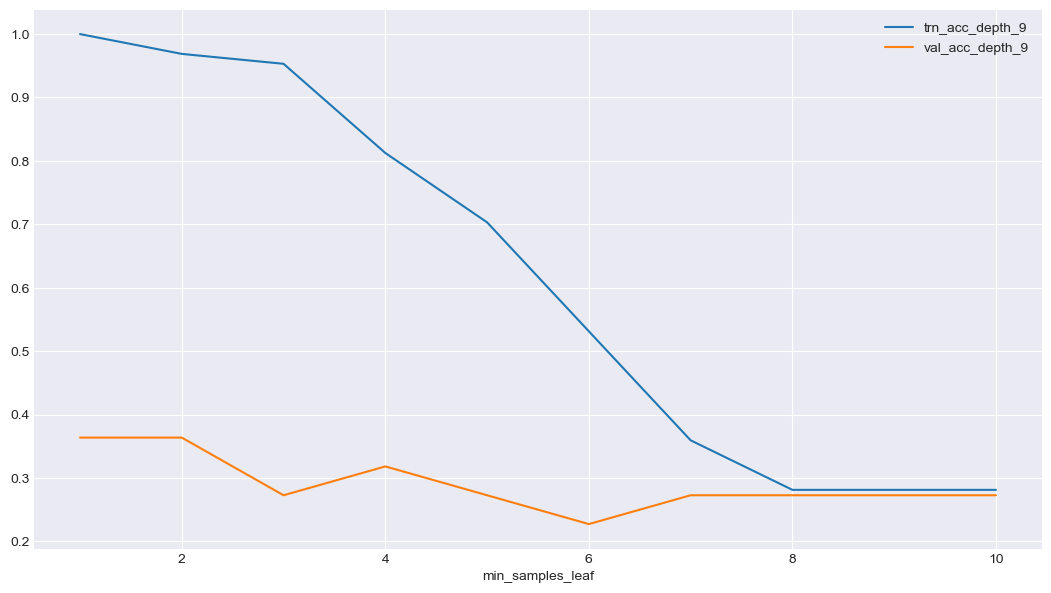

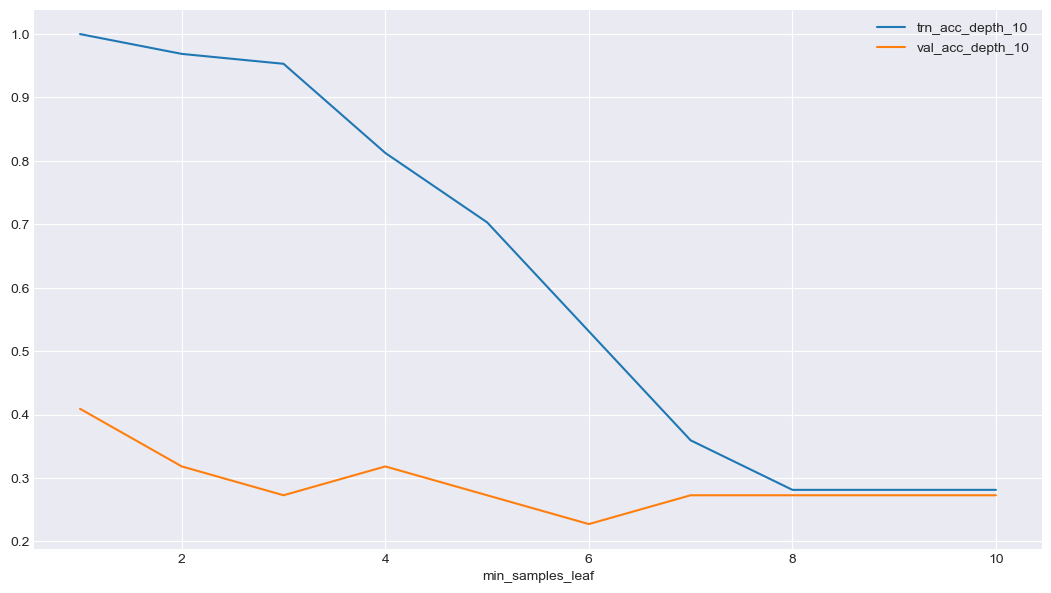

In [113]:
# plot the various rf tree scores
for i in rf_df.index:
    rf_df[f'trn_acc_depth_{i}'].plot(legend=True)
    rf_df[f'val_acc_depth_{i}'].plot(legend=True)
    plt.show()

## Keila final report rf model

In [114]:
# get model results
#build my model
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1, random_state=123)
rf.fit(x_bow, y_train)

# get model results
print(f" Train Score: {rf.score(x_bow, y_train)}, Validation Score: {rf.score(x_validate_bow, y_validate)}")

 Train Score: 0.953125, Validation Score: 0.3181818181818182


* Random Forest beats baseline 
* Again, there is an even steeper drop between train and validate

## Model: KNN

## Corey work

In [148]:
knn_df = m.get_knn_metrics(x_bow, x_validate_bow, y_train, y_validate)
knn_df

,train_acc,val_acc
n_neighbors,,
1,1.000000,0.227273
2,0.578125,0.181818
3,0.609375,0.227273
4,0.781250,0.272727
5,0.781250,0.227273
6,0.421875,0.227273
7,0.218750,0.181818
8,0.328125,0.181818
9,0.250000,0.181818


## Keila

In [47]:
# get model results
#build my model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_bow, y_train)

# get model results
print(f" Train Score: {knn.score(x_bow, y_train)}, Validation Score: {knn.score(x_validate_bow, y_validate)}")

 Train Score: 0.5757575757575758, Validation Score: 0.4090909090909091


* KNN beats baseline 
* Drop off between train and validate is not as great as the other two, but overall it is lower than Decision Tree

# NOW RUN WITH TfidfVectorizer

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [196]:
# create bag of words
tfid_v = TfidfVectorizer(ngram_range=(1,1))
x_bow = tfid_v.fit_transform(x_train)
x_validate_bow = tfid_v.transform(x_validate)
x_test_bow = tfid_v.transform(x_test)

In [197]:
x_bow.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.02603771],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00410431,
         0.        ]])

In [198]:
x_bow.shape

(64, 5073)

In [199]:
tfid_v.get_feature_names_out()

array(['aa', 'aaaaaaaahsm', 'aaaaaaaahtq', ..., 'zshrc', 'zt', 'zu'],
      dtype=object)

In [200]:
bow = pd.DataFrame(x_bow.todense(), columns=tfid_v.get_feature_names())
bow.head()

,aa,aaaaaaaahsm,aaaaaaaahtq,aaffa,aar,aaron,ab,abelson,ability,able,...,zipball,zipmark,zk,zoho,zoo,zoom,zsh,zshrc,zt,zu
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.035628,0.0,0.0,0.0,0.0,...,0.011876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
#build my model
gnb = GaussianNB()
gnb.fit(x_bow.todense(), y_train)
gnb.score(x_bow.todense(), y_train)

# get model results
print(f" Train Score: {gnb.score(x_bow.todense(), y_train)}, Validation Score: {gnb.score(x_validate_bow.todense(), y_validate)}")

 Train Score: 1.0, Validation Score: 0.45454545454545453


In [202]:
#build my model
gnb = MultinomialNB()
gnb.fit(x_bow.todense(), y_train)
gnb.score(x_bow.todense(), y_train)

# get model results
print(f" Train Score: {gnb.score(x_bow.todense(), y_train)}, Validation Score: {gnb.score(x_validate_bow.todense(), y_validate)}")

 Train Score: 0.796875, Validation Score: 0.2727272727272727


In [203]:
#build my model
gnb = ComplementNB()
gnb.fit(x_bow.todense(), y_train)
gnb.score(x_bow.todense(), y_train)

# get model results
print(f" Train Score: {gnb.score(x_bow.todense(), y_train)}, Validation Score: {gnb.score(x_validate_bow.todense(), y_validate)}")

 Train Score: 1.0, Validation Score: 0.5454545454545454


In [204]:
#build my model
gnb = BernoulliNB()
gnb.fit(x_bow.todense(), y_train)
gnb.score(x_bow.todense(), y_train)

# get model results
print(f" Train Score: {gnb.score(x_bow.todense(), y_train)}, Validation Score: {gnb.score(x_validate_bow.todense(), y_validate)}")

 Train Score: 0.578125, Validation Score: 0.3181818181818182


## Model Name: DecisionTreeClassifier

## Following cells are Corey making sure I can replicate modeling

In [205]:
import my_model as m

In [206]:
m.get_dtree_scores(x_bow, x_validate_bow, y_train, y_validate, crit='gini', max_d=20)

,train_acc,val_acc,difference
max_depth,,,
1,0.390625,0.318182,0.072443
2,0.546875,0.363636,0.183239
3,0.656250,0.409091,0.247159
4,0.734375,0.363636,0.370739
5,0.843750,0.454545,0.389205
6,0.906250,0.363636,0.542614
7,0.953125,0.454545,0.498580
8,0.984375,0.409091,0.575284
9,1.000000,0.363636,0.636364


# Keila's work

In [207]:
#build my model
tree = DecisionTreeClassifier(max_depth=7, random_state=123)
tree.fit(x_bow, y_train)
tree.score(x_bow, y_train)

# get model results
print(f" Train Score: {tree.score(x_bow, y_train)}, Validation Score: {tree.score(x_validate_bow, y_validate)}")

 Train Score: 0.953125, Validation Score: 0.4090909090909091


* DecisionTreeClassifier beats baseline
* There is a noticeable drop between train and validate even on the best Decision Tree

## Model: Random Forest

## Corey work

In [208]:
rf_df = m.get_rf_scores(x_bow, x_validate_bow, y_train, y_validate)
rf_df.head()

,trn_acc_depth_1,val_acc_depth_1,diff_1,trn_acc_depth_2,val_acc_depth_2,diff_2,trn_acc_depth_3,val_acc_depth_3,diff_3,trn_acc_depth_4,...,diff_7,trn_acc_depth_8,val_acc_depth_8,diff_8,trn_acc_depth_9,val_acc_depth_9,diff_9,trn_acc_depth_10,val_acc_depth_10,diff_10
min_samples_leaf,,,,,,,,,,,,,,,,,,,,,
1,0.296875,0.272727,0.024148,0.546875,0.318182,0.228693,0.843750,0.318182,0.525568,0.968750,...,0.636364,1.000000,0.318182,0.681818,1.000000,0.318182,0.681818,1.000000,0.272727,0.727273
2,0.296875,0.272727,0.024148,0.546875,0.318182,0.228693,0.828125,0.318182,0.509943,0.921875,...,0.757102,0.984375,0.272727,0.711648,1.000000,0.318182,0.681818,1.000000,0.318182,0.681818
3,0.296875,0.272727,0.024148,0.515625,0.318182,0.197443,0.765625,0.318182,0.447443,0.937500,...,0.650568,0.968750,0.318182,0.650568,0.968750,0.363636,0.605114,0.968750,0.363636,0.605114
4,0.296875,0.318182,-0.021307,0.515625,0.318182,0.197443,0.687500,0.318182,0.369318,0.796875,...,0.526989,0.875000,0.363636,0.511364,0.875000,0.363636,0.511364,0.875000,0.363636,0.511364
5,0.281250,0.272727,0.008523,0.453125,0.318182,0.134943,0.656250,0.318182,0.338068,0.750000,...,0.447443,0.765625,0.318182,0.447443,0.765625,0.318182,0.447443,0.765625,0.318182,0.447443


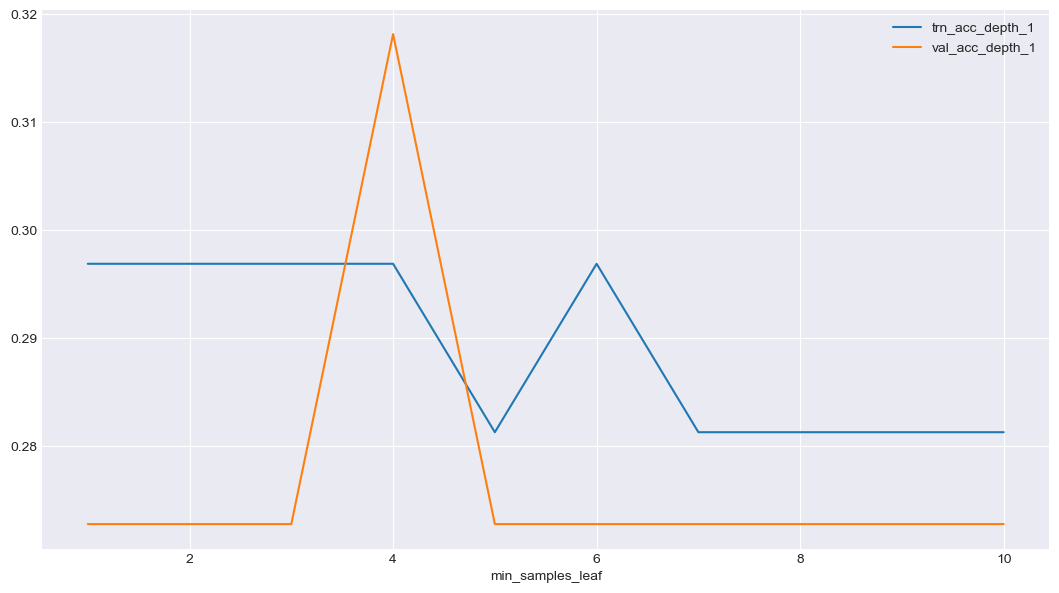

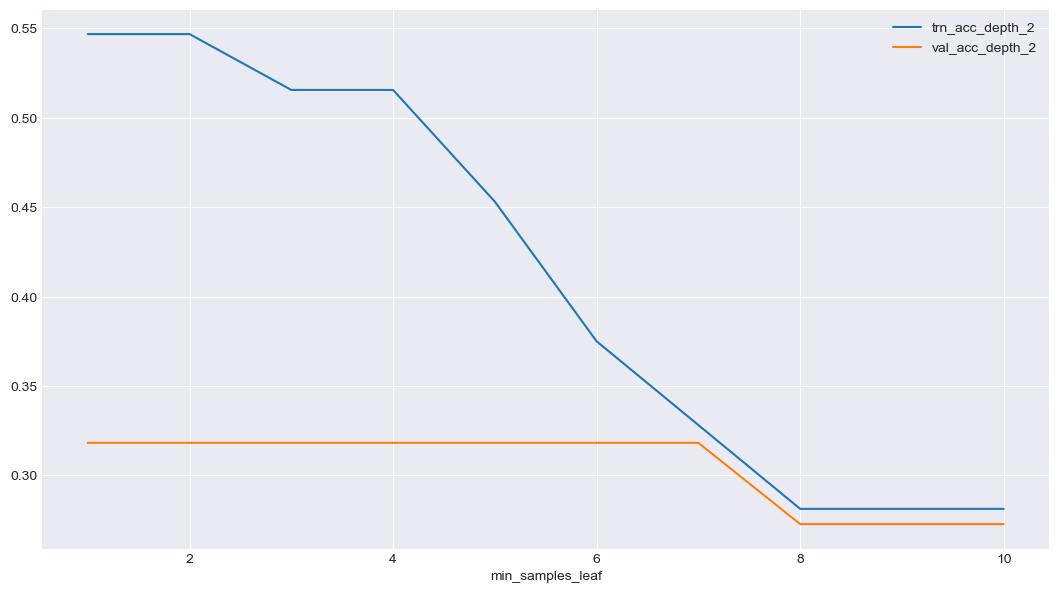

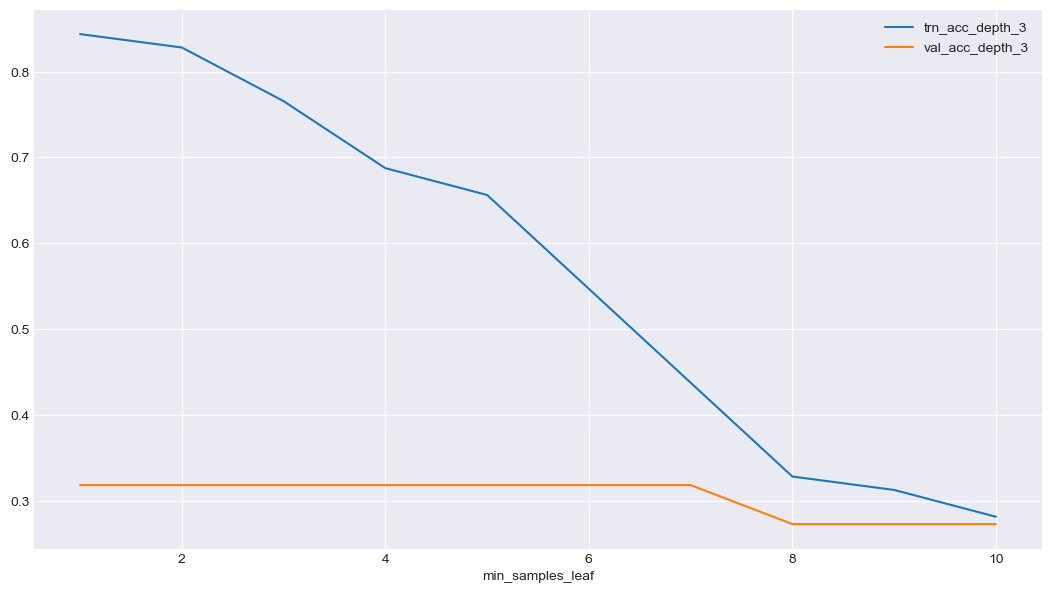

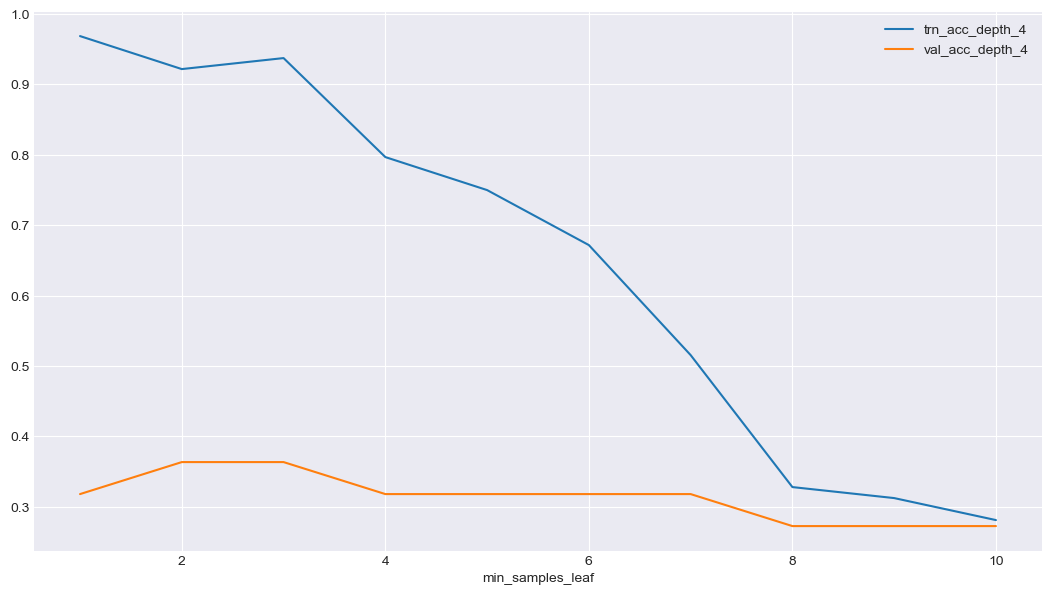

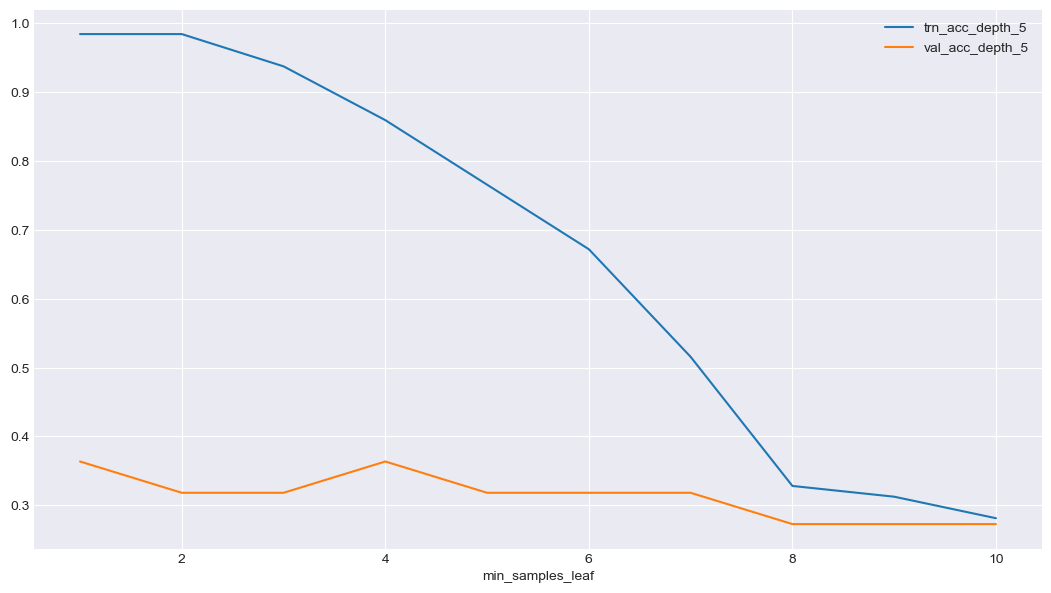

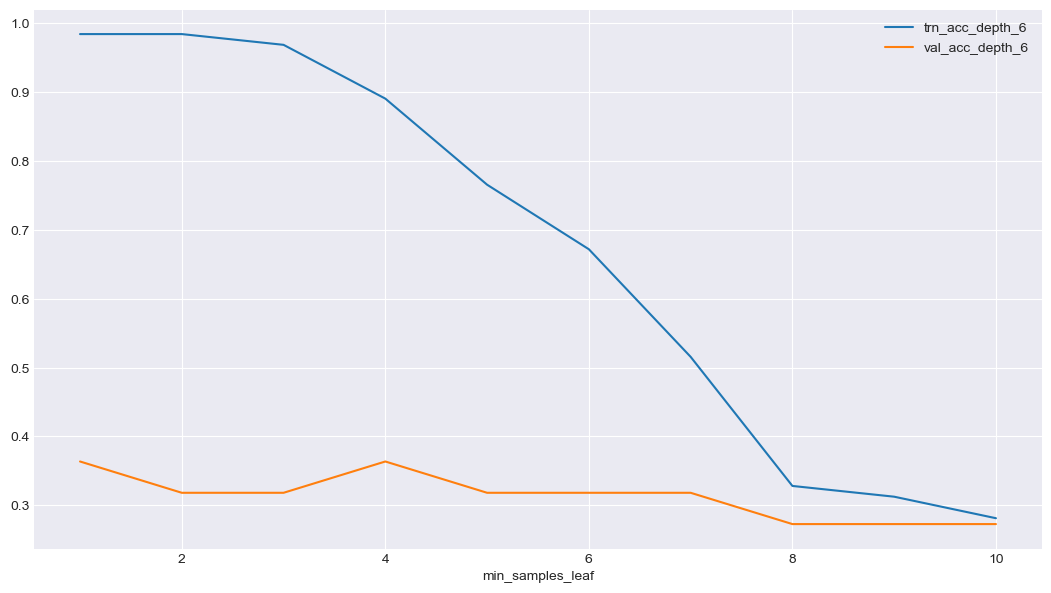

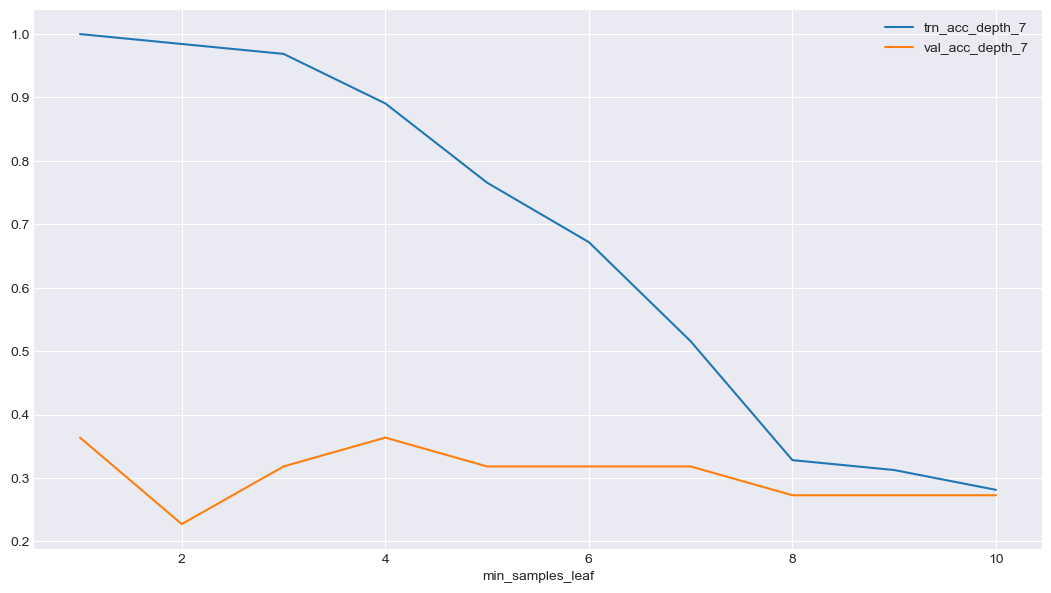

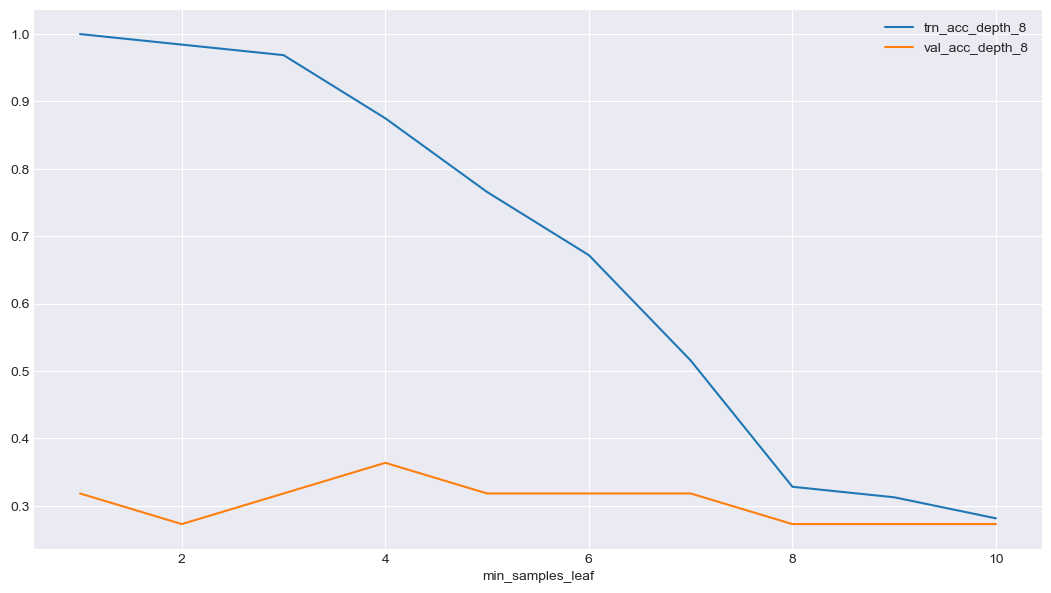

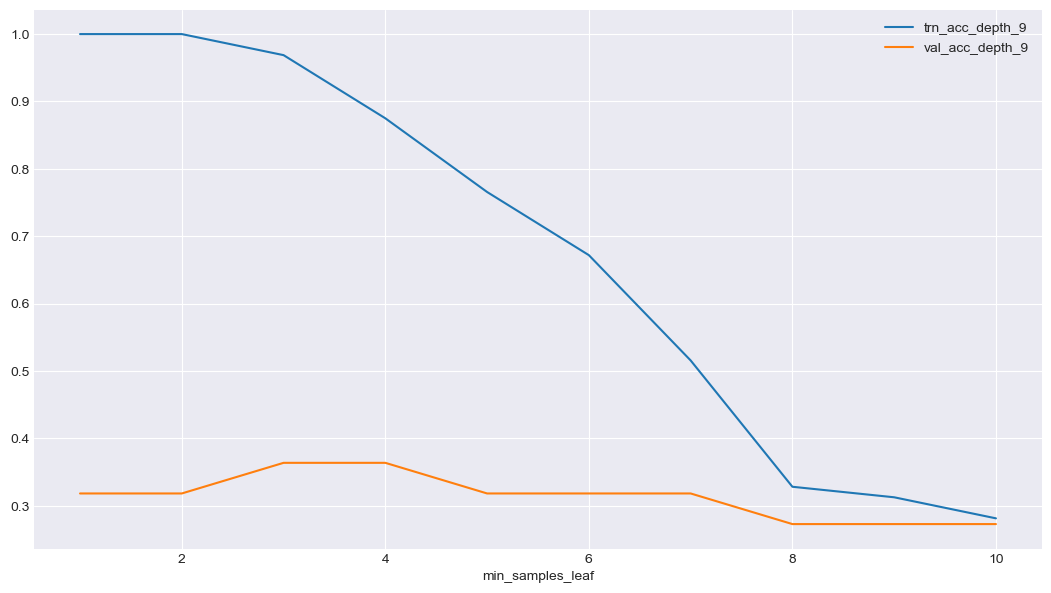

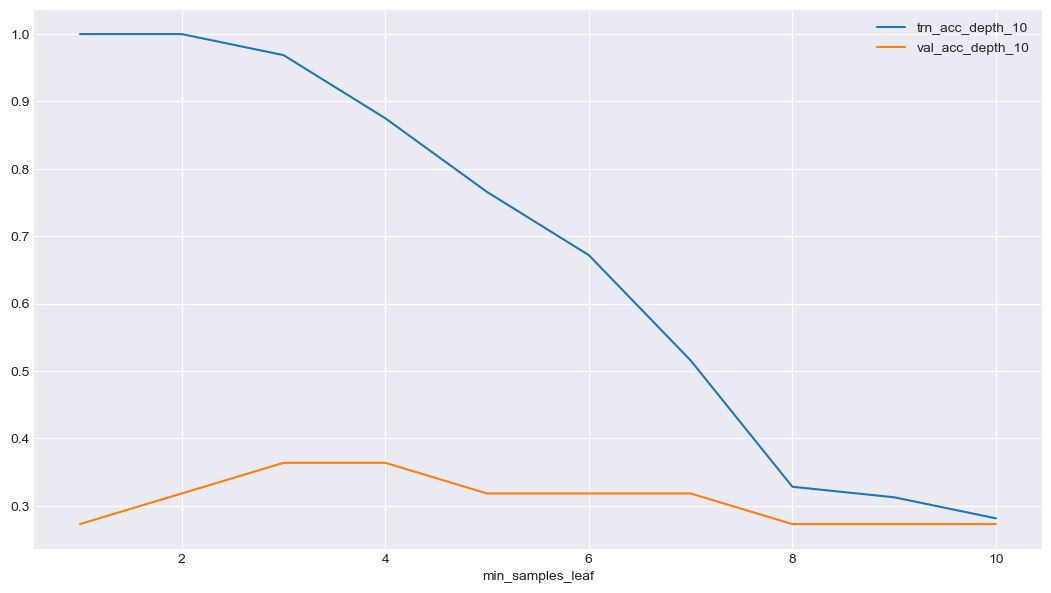

In [209]:
# plot the various rf tree scores
for i in rf_df.index:
    rf_df[f'trn_acc_depth_{i}'].plot(legend=True)
    rf_df[f'val_acc_depth_{i}'].plot(legend=True)
    plt.show()

## Keila final report rf model

In [210]:
# get model results
#build my model
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1, random_state=123)
rf.fit(x_bow, y_train)

# get model results
print(f" Train Score: {rf.score(x_bow, y_train)}, Validation Score: {rf.score(x_validate_bow, y_validate)}")

 Train Score: 0.953125, Validation Score: 0.45454545454545453


* Random Forest beats baseline 
* Again, there is an even steeper drop between train and validate

## Model: KNN

## Corey work

In [211]:
knn_df = m.get_knn_metrics(x_bow, x_validate_bow, y_train, y_validate)
knn_df

,train_acc,val_acc
n_neighbors,,
1,1.000000,0.409091
2,0.812500,0.500000
3,0.734375,0.409091
4,0.718750,0.363636
5,0.718750,0.318182
6,0.687500,0.363636
7,0.687500,0.363636
8,0.609375,0.409091
9,0.671875,0.454545


## Keila

In [212]:
# get model results
#build my model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_bow, y_train)

# get model results
print(f" Train Score: {knn.score(x_bow, y_train)}, Validation Score: {knn.score(x_validate_bow, y_validate)}")

 Train Score: 0.734375, Validation Score: 0.4090909090909091


## Comparing Models
* Baseline was 27%
* DecisionTreeClassifier beat baseline with 89%/50% on train/validate
* Random Forest beat baseline with 95%/32% on train/validate
* KNN beat baseline with 59%/36% on train/validate
* We have chosen to move forward with the DecisionTree model on test

## Best Model Decision Tree on Test

In [213]:
# get test results for final model
tree.score(x_test_bow, y_test)

0.36363636363636365

## Modeling Summary
* The model outperformed the baseline by 37%

# Conclusions

## Exploration
* The most popular languages in our dataset were JavaScript, Objective-C, and Java
* There were 19 different languages in our dataset, 6 of which occurred only once, and 4 only twice
* The length of the readme did not correlate to the type of language
* There were some words and word combinations that correlated with the programming language.

## Modeling
* Our best model was a Decision Tree model. The baseline was 27% (guessing 'JavaScript' for every entry would have been correct 27% of the time), and our best model achieved a 64% accuracy on the test data set. This is the expected accuracy on unseen data.

## Recommendations
* The  model can be used to focus recruiting & development, by automating the classification of large sums of unlabeled documents.

## Next steps
* With more time, we would acquire more README files to have a larger data set. We would also explore other models such as the various Naive Bayes models, to see if we could improve the accuracy.